In [9]:
import datetime as dt
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


tickers = ["AMZN","MSFT","META","GOOG"]
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in tickers:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: title={'center': 'Stock Price Evolution'}, xlabel='Date'>

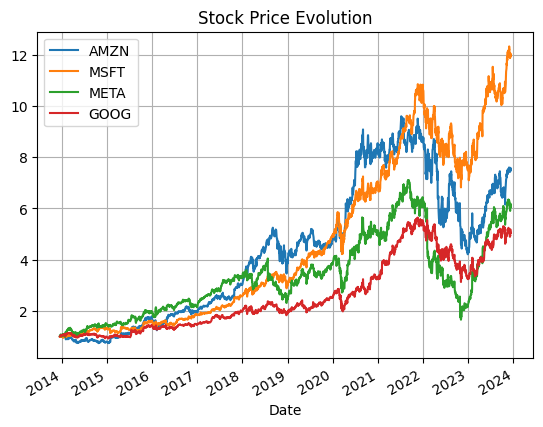

In [11]:
(1+daily_return).cumprod().plot(title = "Stock Price Evolution", grid =True) 

<BarContainer object of 4 artists>

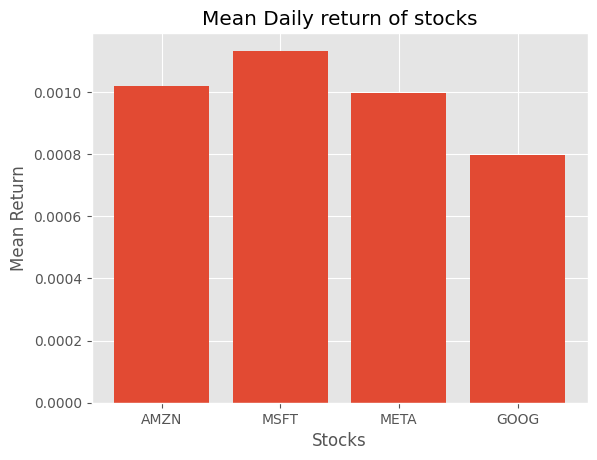

In [19]:
fig , ax = plt.subplots()
ax.set(title = "Mean Daily return of stocks",
       xlabel = "Stocks",
       ylabel = "Mean Return")
plt.style.available    #-- us4e this to see many different presets of styles
plt.style.use("ggplot")
plt.bar(x=daily_return.columns, height=daily_return.mean())